**IMPORT MODULES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Loading and Preparing the Iris Dataset**

In [2]:
data = pd.read_csv('Iris.csv')
data_points = data.iloc[:, 1:5]
labels = data.iloc[:, 5]

**Split Data Into Testing and Training Data**

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_points,labels,test_size=0.2)

**Normalization/Standardization of Data**

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
Standard_obj = StandardScaler()
Standard_obj.fit(x_train)
x_train_std = Standard_obj.transform(x_train)
x_test_std = Standard_obj.transform(x_test)

**Applying Classification ML model**

*Decision Tree*

In [5]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(x_train_std, y_train)
print('Training data accuracy {:.2f}'.format(decision_tree.score(x_train_std, y_train)*100))
print('Testing data accuracy {:.2f}'.format(decision_tree.score(x_test_std, y_test)*100))

Training data accuracy 100.00
Testing data accuracy 93.33


In [6]:
#classification
y_pred = decision_tree.predict(x_test_std)
y_pred.tolist()
y_test.to_numpy()
y_test.tolist
print("Y_test                         Y_pred")
res = "\n".join("{}                   {}".format(x, y) for x, y in zip(y_test, y_pred))
print(res)

Y_test                         Y_pred
Iris-virginica                   Iris-virginica
Iris-setosa                   Iris-setosa
Iris-virginica                   Iris-virginica
Iris-virginica                   Iris-virginica
Iris-setosa                   Iris-setosa
Iris-setosa                   Iris-setosa
Iris-virginica                   Iris-virginica
Iris-virginica                   Iris-virginica
Iris-versicolor                   Iris-versicolor
Iris-virginica                   Iris-virginica
Iris-virginica                   Iris-versicolor
Iris-virginica                   Iris-virginica
Iris-versicolor                   Iris-versicolor
Iris-setosa                   Iris-setosa
Iris-setosa                   Iris-setosa
Iris-setosa                   Iris-setosa
Iris-versicolor                   Iris-versicolor
Iris-versicolor                   Iris-versicolor
Iris-versicolor                   Iris-versicolor
Iris-versicolor                   Iris-versicolor
Iris-virginica           

*considering new data as the mean value of 150 entries of each field*

In [7]:
#average data -> average value of all 4 feature tuples present in the dataset
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

*inputting the new data values*

In [8]:
new_data=pd.DataFrame([[5.843333,3.054000,3.758667,1.198667]], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
print(new_data)

Standard_obj.fit(new_data)
new_data = Standard_obj.transform(new_data)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       5.843333         3.054       3.758667      1.198667


*fit new data to the model*

In [9]:
y_pred = decision_tree.predict(new_data)
print(y_pred)

['Iris-versicolor']


[Text(0.4, 0.9, 'petal length (cm) <= -0.743\ngini = 0.666\nsamples = 120\nvalue = [43, 38, 39]\nclass = setosa'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7, 'petal width (cm) <= 0.737\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]\nclass = virginica'),
 Text(0.2, 0.5, 'petal length (cm) <= 0.759\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]\nclass = versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.3, 0.3, 'sepal length (cm) <= 0.278\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.8, 0.5, 'petal length (cm) <= 0.648\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica'),
 Text(0.7, 0.3, 'sepal width (cm) <= 0.042\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = vir

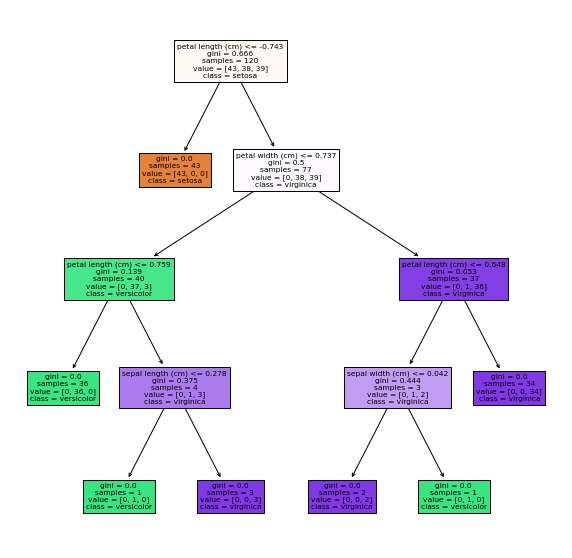

In [11]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

iris = datasets.load_iris()
fig = plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree, feature_names=iris.feature_names, class_names=iris.target_names,filled=True)